# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [35]:
df = pd.read_csv("Dataset_inisiasi.csv", delimiter=",")
df.head()

,gk,peng,poverty_to_expense_ratio,Cluster,daerah,jenis
0,293697.0,466355.0,0.629771,1,PERKOTAAN,MAKANAN
1,302128.0,466355.0,0.647850,1,PERKOTAAN,MAKANAN
2,306243.0,548853.0,0.557969,1,PERKOTAAN,MAKANAN
3,319768.0,548853.0,0.582611,1,PERKOTAAN,MAKANAN
4,297479.0,395136.0,0.752852,5,PERDESAAN,MAKANAN


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [36]:
categorical_columns = ["daerah", "jenis"]
numeric_columns = ["gk","peng","poverty_to_expense_ratio"]

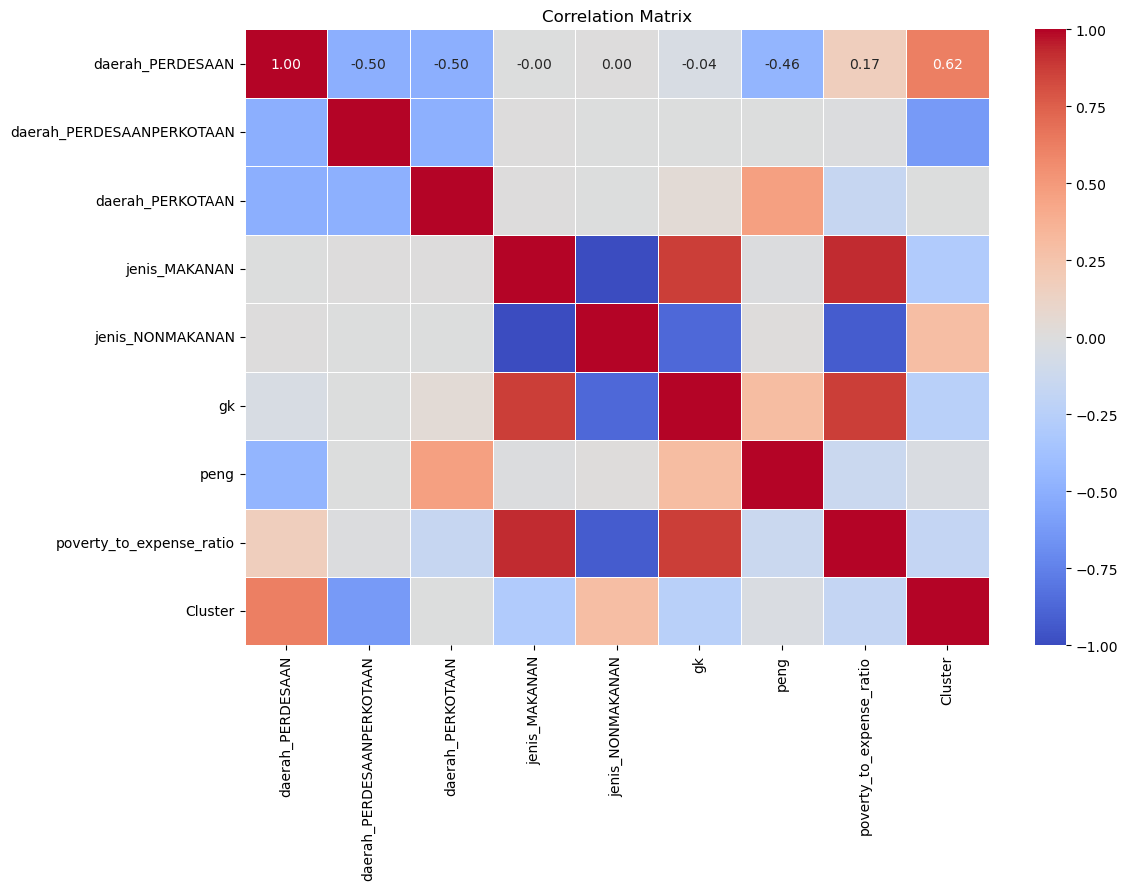

In [37]:
scaler = MinMaxScaler()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

df_temp = pd.concat([encoded_df, df[numeric_columns], df["Cluster"]], axis=1)

corr_matrix = df_temp.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [38]:
encoded_df = encoded_df.drop(columns=['daerah_PERKOTAAN', 'daerah_PERDESAAN', 'jenis_MAKANAN', 'jenis_NONMAKANAN']) 
scaled_numeric = scaler.fit_transform(df[numeric_columns])
scaled_df = pd.DataFrame(scaled_numeric, columns=numeric_columns)
scaled_df = scaled_df.drop(columns= ['gk'])

df_final = pd.concat([scaled_df, encoded_df, df["Cluster"]], axis=1)

X = df_final.drop(columns=['Cluster'])
y = df_final['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2681, 3), y_train=(2681,)
Test set shape: X_test=(671, 3), y_test=(671,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [39]:
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

 
print("Model training selesai.")

Model training selesai.


K-Nearest Neighbors (KNN) adalah algoritma berbasis instance yang menentukan kelas berdasarkan mayoritas k tetangga terdekat, sederhana namun kurang efisien untuk dataset besar. Sementara itu, Support Vector Machine (SVM) mencari hyperplane optimal untuk memisahkan kelas dengan margin maksimal, lebih akurat terutama untuk data berdimensi tinggi, tetapi lebih lambat dibanding KNN.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

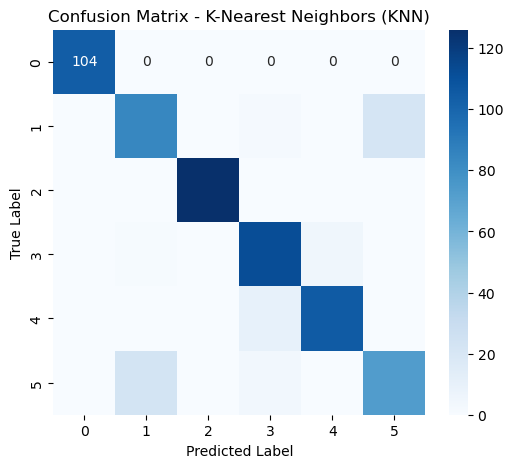

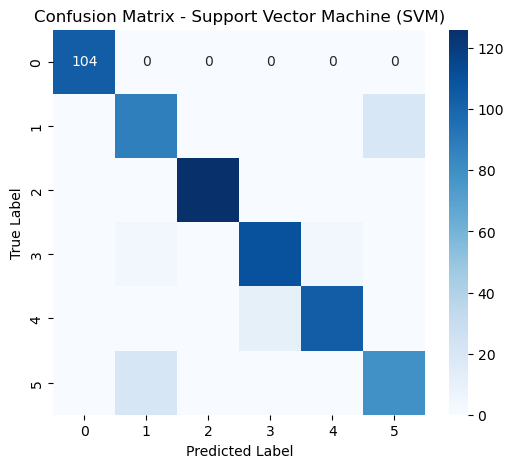

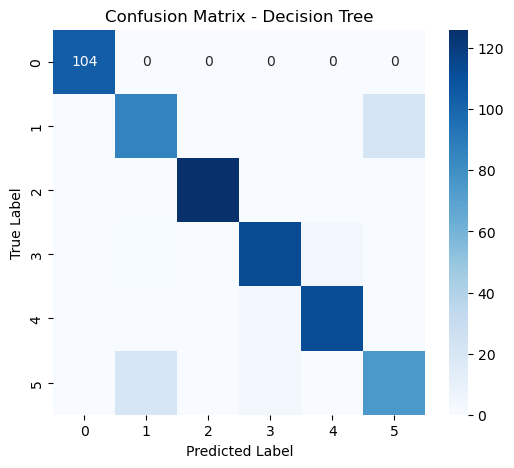

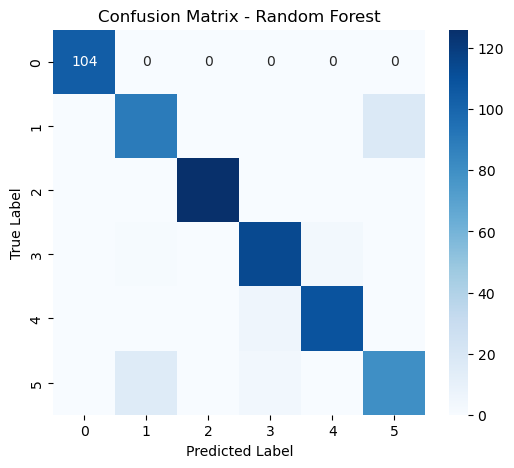

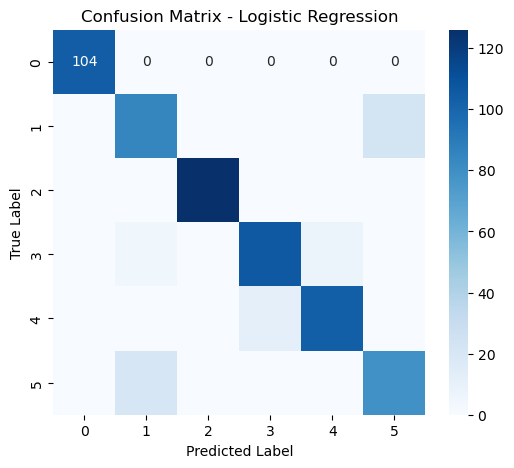

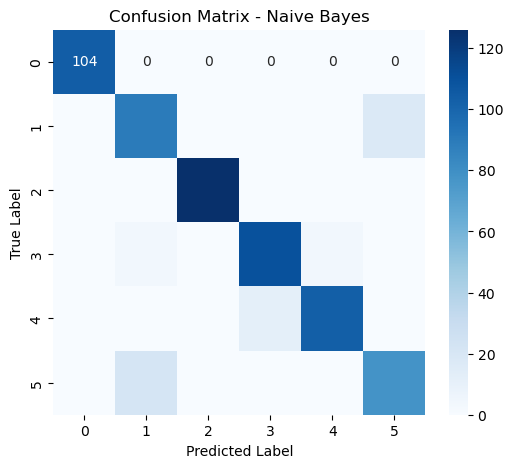

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.900149   0.899948  0.900149  0.899631
1  Support Vector Machine (SVM)  0.910581   0.911949  0.910581  0.911013
2                 Decision Tree  0.918033   0.917244  0.918033  0.917597
3                 Random Forest  0.928465   0.928282  0.928465  0.928228
4           Logistic Regression  0.898659   0.899904  0.898659  0.899169
5                   Naive Bayes  0.910581   0.912276  0.910581  0.910963


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Model': model_name,
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return results

models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Support Vector Machine (SVM)': svm,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Logistic Regression': lr,
    'Naive Bayes': nb
}

results = {name: evaluate_model(model, X_test, y_test, name) for name, model in models.items()}

summary_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for name, metrics in results.items()
])

print(summary_df)


| Model                         | Accuracy | Precision | Recall | F1-Score |
|--------------------------------|----------|-----------|--------|----------|
| K-Nearest Neighbors (KNN)      | 0.900149 | 0.899948  | 0.900149 | 0.899631 |
| Support Vector Machine (SVM)   | 0.910581 | 0.911949  | 0.910581 | 0.911013 |
| Decision Tree                  | 0.918033 | 0.917244  | 0.918033 | 0.917597 |
| Random Forest                  | 0.928465 | 0.928282  | 0.928465 | 0.928228 |
| Logistic Regression            | 0.898659 | 0.899904  | 0.898659 | 0.899169 |
| Naive Bayes                    | 0.910581 | 0.912276  | 0.910581 | 0.910963 |

### 1. Akurasi (Accuracy)
- Random Forest memiliki akurasi tertinggi (0.928465), diikuti oleh SVM (0.910581), dan KNN (0.900149).
- Ini menunjukkan bahwa Random Forest memiliki performa terbaik dalam mengklasifikasikan data uji.

### 2. Presisi (Precision)
- Presisi Random Forest lebih tinggi (0.928282) dibandingkan model lainnya, dengan SVM (0.911949).
- Ini berarti Naive Bayes lebih sedikit membuat kesalahan dalam memprediksi kelas positif.

### 3. Recall
- Recall Random Forest (0.928465) dan Decision Tree (0.918033) memiliki nilai yang lebih tinggi dibandingkan model lainnya, menunjukkan kemampuan mereka untuk menangkap lebih banyak sampel yang benar.

### 4. F1-Score
- Random Forest memiliki F1-Score tertinggi (0.928228), diikuti oleh SVM (0.911013) dan Naive Bayes (0.910963).
- F1-Score yang lebih tinggi menunjukkan keseimbangan yang lebih baik antara presisi dan recall pada Random Forest.

## Confusion Matrix
- Dari visualisasi confusion matrix, dapat dilihat bahwa Random Forest memiliki kesalahan prediksi yang minim.
- Semua model memiliki performa yang baik dalam mengklasifikasikan kategori "Rendah", tetapi masih terdapat kesalahan dalam kategori lainnya seperti "Sedang" dan "Tinggi".


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30, 40, 50, None],  
    'min_samples_split': np.arange(2, 20, 1),  
    'min_samples_leaf': np.arange(1, 20, 1), 
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

best_tree = random_search.best_estimator_


Best Parameters: {'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Best Accuracy: 0.9033943411434449


In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(**random_search.best_params_)
rf = RandomForestClassifier(n_estimators=200)
svm = SVC(probability=True)  

voting_clf = VotingClassifier(estimators=[
    ('dt', tree), ('rf', rf), ('svm', svm)
], voting='soft')

voting_clf.fit(X_train, y_train)
print("Voting Classifier Accuracy:", voting_clf.score(X_test, y_test))


Voting Classifier Accuracy: 0.9225037257824144


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [43]:
def evaluate_tuned_model(model, X_test, y_test, model_name="Tuned Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Model': model_name,
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

    # Visualisasi Confusion Matrix setelah tuning
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return results

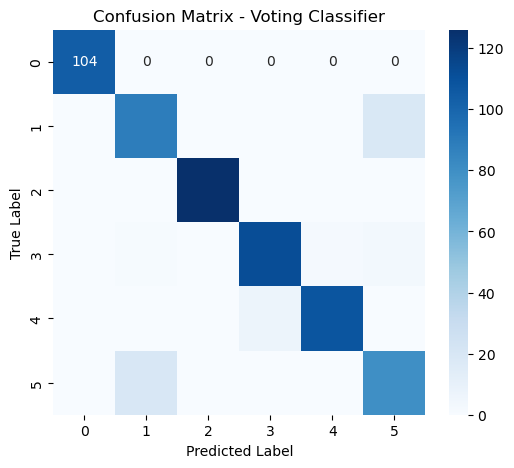

In [44]:
tuned_results = evaluate_tuned_model(voting_clf, X_test, y_test, model_name="Voting Classifier")

In [45]:
tuned_summary_df = pd.DataFrame([{
    'Model': tuned_results['Model'],
    'Accuracy': tuned_results['Accuracy'],
    'Precision': tuned_results['Precision'],
    'Recall': tuned_results['Recall'],
    'F1-Score': tuned_results['F1-Score']
}], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

print(tuned_summary_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Voting Classifier  0.922504   0.923668  0.922504  0.922979


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## Identifikasi kelemahan model

## Evaluasi Model Klasifikasi

### 1. K-Nearest Neighbors (KNN)
- **Akurasi**: 0.900 (cukup baik)
- **F1-Score**: 0.900 (cukup baik)
- **Kelemahan**: 
  - Meskipun performa cukup baik, KNN cenderung lambat dalam prediksi untuk dataset besar. 
  - KNN juga sensitif terhadap skala data, sehingga normalisasi atau standarisasi sangat penting.

### 2. Support Vector Machine (SVM)
- **Akurasi**: 0.911 (cukup baik)
- **F1-Score**: 0.911 (cukup baik)
- **Kelemahan**: 
  - SVM cenderung lambat untuk dataset besar. 
  - Performa SVM sangat bergantung pada pemilihan kernel dan hyperparameter.

### 3. Decision Tree
- **Akurasi**: 0.918 (cukup baik)
- **F1-Score**: 0.918 (cukup baik)
- **Kelemahan**: 
  - Meskipun akurasi tinggi, Decision Tree rentan terhadap overfitting jika tidak dipangkas dengan benar.

### 4. Random Forest
- **Akurasi**: 0.928 (baik)
- **F1-Score**: 0.928 (baik)
- **Kelemahan**: 
  - Meskipun performa sangat baik, Random Forest bisa menjadi lambat dan memerlukan banyak memori untuk dataset yang sangat besar.

### 5. Logistic Regression
- **Akurasi**: 0.899 (cukup baik)
- **F1-Score**: 0.899 (cukup baik)
- **Kelemahan**: 
  - Logistic Regression tidak selalu bekerja dengan baik pada data non-linear dan memiliki performa yang lebih rendah dibandingkan beberapa model lainnya.

### 6. Naive Bayes
- **Akurasi**: 0.911 (cukup baik)
- **F1-Score**: 0.911 (cukup baik)
- **Kelemahan**: 
  - Naive Bayes mengasumsikan bahwa fitur-fitur bersifat independen, yang mungkin tidak selalu berlaku pada data dunia nyata.

### 7. Voting Classifier
- **Akurasi**: 0.923 (cukup baik)
- **F1-Score**: 0.923 (cukup baik)
- **Kelemahan**: 
  - Menggabungkan beberapa model, tetapi bisa menjadi lebih lambat tergantung pada model-model yang digunakan dalam ensemble.


## Kesimpulan

### Performansi Model
- **Random Forest** mencatat akurasi dan F1-Score tertinggi (0.928), menjadikannya model terbaik dalam evaluasi ini.
- **Decision Tree** juga menunjukkan performa yang baik dengan akurasi dan F1-Score 0.918, meskipun rentan terhadap overfitting.
- **SVM** dan **Naive Bayes** memiliki performa yang cukup baik dengan akurasi dan F1-Score 0.911.
- **KNN** dan **Logistic Regression** memiliki performa yang sedikit lebih rendah dengan akurasi dan F1-Score masing-masing 0.900 dan 0.899.
- **Voting Classifier** menunjukkan performa yang baik dengan akurasi dan F1-Score 0.923, meskipun bisa menjadi lebih lambat karena menggabungkan beberapa model.

### Kelemahan Umum
- Beberapa model seperti **KNN**, **SVM**, dan **Random Forest** cenderung lambat untuk dataset besar.
- **Decision Tree** rentan terhadap overfitting jika tidak dipangkas dengan benar.
- **Logistic Regression** tidak efektif untuk data non-linear.
- **Naive Bayes** mengasumsikan independensi fitur, yang mungkin tidak selalu berlaku dalam data dunia nyata.

## Rekomendasi yang dapat dilakukan

- **Mengumpulkan/Menambahkan data** untuk meningkatkan generalisasi model.
- **Menyeimbangkan dataset** jika ada kelas minoritas yang kurang terwakili.
- **Menguji algoritma lain** seperti Neural Networks jika ingin meningkatkan akurasi.